In [90]:
from IPython.display import display
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [91]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [92]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
data1 = [train, test]

In [94]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [95]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [96]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

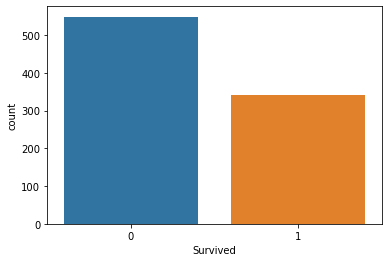

In [98]:
sns.countplot(train['Survived'])

In [99]:
# Making Column 'FamilySize'
for dataset in data1:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [100]:
train.corrwith(train['FamilySize'])

PassengerId   -0.040143
Survived       0.016639
Pclass         0.065997
Age           -0.301914
SibSp          0.890712
Parch          0.783111
Fare           0.217138
FamilySize     1.000000
dtype: float64

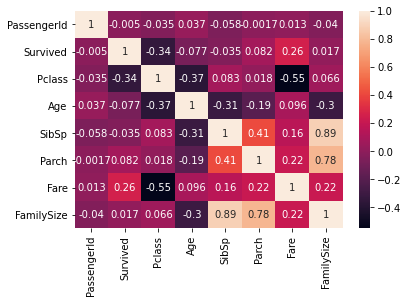

In [101]:
sns.heatmap(train.corr(), annot=True)

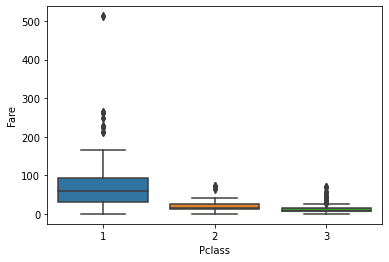

In [102]:
sns.boxplot(x='Pclass', y='Fare', data=train)

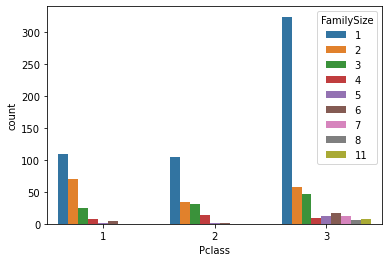

In [103]:
sns.countplot(x='Pclass', hue='FamilySize', data=train)

In [104]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [105]:
for dataset in data1:
    display(dataset['Cabin'].isnull().sum() / len(dataset['Cabin']))

0.7710437710437711

0.7822966507177034

In [106]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [107]:
for dataset in data1:
    #dataset['TravellingAlone'] = np.nan
    dataset.loc[dataset['FamilySize'] == 1 ,'TravellingAlone'] = 1
    dataset.loc[dataset['FamilySize'] != 1 ,'TravellingAlone'] = 0

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,TravellingAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1.0


In [109]:
for dataset in data1:
    dataset['TravellingAlone'] = dataset['TravellingAlone'].astype('int64')

In [110]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,TravellingAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [111]:
train.corrwith(train['TravellingAlone'])

PassengerId        0.057462
Survived          -0.203367
Pclass             0.135207
Age                0.198270
SibSp             -0.584471
Parch             -0.583398
Fare              -0.271832
FamilySize        -0.690922
TravellingAlone    1.000000
dtype: float64

In [112]:
for dataset in data1:
    print(dataset.isnull().sum())
    print('-'*19)

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
FamilySize           0
TravellingAlone      0
dtype: int64
-------------------
PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                 86
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin              327
Embarked             0
FamilySize           0
TravellingAlone      0
dtype: int64
-------------------


In [113]:
train.corrwith(train['Age'])

PassengerId        0.036847
Survived          -0.077221
Pclass            -0.369226
Age                1.000000
SibSp             -0.308247
Parch             -0.189119
Fare               0.096067
FamilySize        -0.301914
TravellingAlone    0.198270
dtype: float64

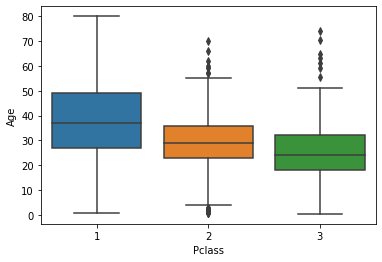

In [114]:
sns.boxplot(x='Pclass', y='Age', data=train)

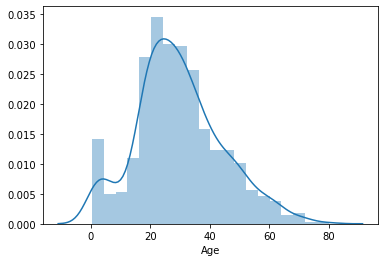

In [115]:
sns.distplot(train['Age'])

In [116]:
train.loc[(train['Pclass'] == 1) ,'Age'].isnull().sum()

30

In [117]:
train.loc[(train['Pclass'] == 2) ,'Age'].isnull().sum()

11

In [118]:
train.loc[(train['Pclass'] == 3) ,'Age'].isnull().sum()

136

In [119]:
train['Age'].isnull().sum()

177

In [120]:
for dataset in data1:
    dataset.loc[(dataset['Pclass'] == 1), 'Age'] = dataset.loc[(dataset['Pclass'] == 1), 'Age'].fillna(dataset.loc[(dataset['Pclass'] == 1), 'Age'].median())
    dataset.loc[(dataset['Pclass'] == 2), 'Age'] = dataset.loc[(dataset['Pclass'] == 2), 'Age'].fillna(dataset.loc[(dataset['Pclass'] == 2), 'Age'].median())
    dataset.loc[(dataset['Pclass'] == 3), 'Age'] = dataset.loc[(dataset['Pclass'] == 3), 'Age'].fillna(dataset.loc[(dataset['Pclass'] == 3), 'Age'].median())

In [121]:
train['Age'].isnull().sum()

0

In [122]:
for dataset in data1:
    print(dataset.isnull().sum())
    print('#'*100)

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
FamilySize           0
TravellingAlone      0
dtype: int64
####################################################################################################
PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin              327
Embarked             0
FamilySize           0
TravellingAlone      0
dtype: int64
####################################################################################################


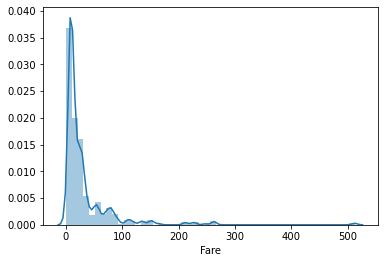

In [123]:
sns.distplot(train['Fare'])

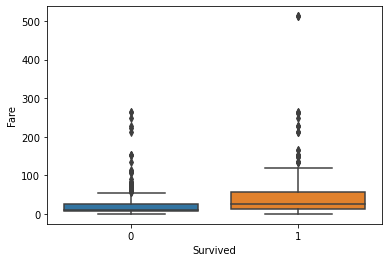

In [124]:
sns.boxplot(x='Survived', y='Fare', data=train)

In [125]:
train.corrwith(train['Fare'])

PassengerId        0.012658
Survived           0.257307
Pclass            -0.549500
Age                0.123784
SibSp              0.159651
Parch              0.216225
Fare               1.000000
FamilySize         0.217138
TravellingAlone   -0.271832
dtype: float64

In [126]:
for dataset in data1:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

In [127]:
test['Fare'].isnull().sum()

0

In [128]:
type(train['Embarked'].mode().values[0])

str

In [129]:
for dataset in data1:
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode().values[0])

In [130]:
passenger_id = test['PassengerId']
for dataset in data1:
    dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

In [131]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravellingAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


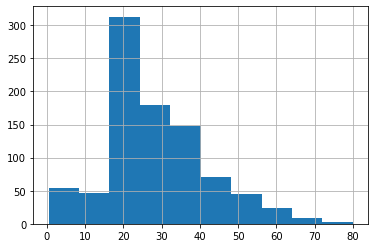

In [132]:
train['Age'].hist()

In [133]:
for dataset in data1:
    dataset['Age'] = dataset['Age'].astype('int64')
train['CategoricalAge'] = pd.cut(train['Age'], 5)
train['CategoricalFare'] = pd.qcut(train['Fare'], 3)

In [134]:
train['CategoricalAge'].value_counts()

(16.0, 32.0]     495
(32.0, 48.0]     216
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: CategoricalAge, dtype: int64

In [135]:
train['CategoricalFare'].value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: CategoricalFare, dtype: int64

In [136]:
for dataset in data1:
    dataset.loc[(dataset['Age'] < 16), 'Age'] = 0
    dataset.loc[(dataset['Age'] >= 16) & (dataset['Age'] < 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] >= 32) & (dataset['Age'] < 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] >= 48) & (dataset['Age'] < 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] >= 64), 'Age'] = 4
    dataset.loc[(dataset['Fare'] < 9.00), 'Fare'] = 0
    dataset.loc[(dataset['Fare'] >=9.00 ) & (dataset['Fare'] < 26.00), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] >= 26.00), 'Fare'] = 2

In [137]:
train.drop(['CategoricalAge', 'CategoricalFare'] ,axis=1, inplace=True)

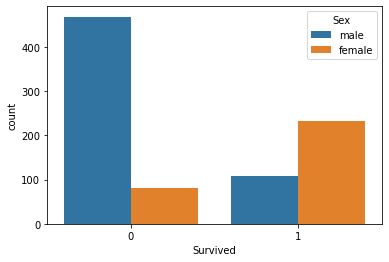

In [138]:
sns.countplot(x='Survived', hue='Sex', data=train)

In [139]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravellingAlone
0,0,3,male,1,0.0,S,0
1,1,1,female,2,2.0,C,0
2,1,3,female,1,0.0,S,1
3,1,1,female,2,2.0,S,0
4,0,3,male,2,0.0,S,1


In [140]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,TravellingAlone
0,3,male,2,0.0,Q,1
1,3,female,2,0.0,S,0
2,2,male,3,1.0,Q,1
3,3,male,1,0.0,S,1
4,3,female,1,1.0,S,0


In [141]:
from sklearn.preprocessing import LabelEncoder
labelEnc = LabelEncoder()
for dataset in data1:
    dataset['Sex_En'] = labelEnc.fit_transform(dataset['Sex'])
    dataset['Embarked_En'] = labelEnc.fit_transform(dataset['Embarked'])
    dataset['Pclass_En'] = labelEnc.fit_transform(dataset['Pclass'])
    dataset.drop(['Sex', 'Embarked', 'Pclass'], axis=1, inplace=True)

In [142]:
train.head()

,Survived,Age,Fare,TravellingAlone,Sex_En,Embarked_En,Pclass_En
0,0,1,0.0,0,1,2,2
1,1,2,2.0,0,0,0,0
2,1,1,0.0,1,0,2,2
3,1,2,2.0,0,0,2,0
4,0,2,0.0,1,1,2,2


In [143]:
test.head()

,Age,Fare,TravellingAlone,Sex_En,Embarked_En,Pclass_En
0,2,0.0,1,1,1,2
1,2,0.0,0,0,2,2
2,3,1.0,1,1,1,1
3,1,0.0,1,1,2,2
4,1,1.0,0,0,2,2


In [144]:
X = train.drop('Survived', axis=1)
y = y_train = train['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [145]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [147]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[148,  27],
       [ 31,  89]])

In [148]:
ac = accuracy_score(y_test,y_pred)
ac

0.8033898305084746

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

In [150]:
ac = accuracy_score(y_test,y_pred_rf)
ac

0.7762711864406779

In [151]:
cm = confusion_matrix(y_test,y_pred_rf)
cm

array([[144,  31],
       [ 35,  85]])

In [152]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)

In [153]:
cm = confusion_matrix(y_test,y_pred_dt)
cm

array([[150,  25],
       [ 38,  82]])

In [154]:
ac = accuracy_score(y_test,y_pred_dt)
ac

0.7864406779661017

In [155]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(3)
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)

In [156]:
cm = confusion_matrix(y_test,y_pred_knn)
cm

array([[148,  27],
       [ 47,  73]])

In [157]:
ac = accuracy_score(y_test,y_pred_knn)
ac

0.7491525423728813

In [158]:
y_pred_test = lr_model.predict(test)

In [159]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)
svc_model.fit(X_train,y_train)
y_pred_svc = svc_model.predict(X_test)

In [160]:
ac = accuracy_score(y_test,y_pred_svc)
ac

0.8101694915254237

In [161]:
y_pred_svc_test = svc_model.predict(test)

### Model Evaluation

In [162]:
from sklearn.metrics import confusion_matrix, classification_report

In [163]:
def evaluate_models(models):
    for model in models:
        print("Evaluation for {}".format(type(model).__name__))
        print("----"*20)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test,y_pred)
        print("\nConfusion Matrix:\n",cm)
        ac = accuracy_score(y_test,y_pred)
        print("\nAccuracy:\n",ac)
        print("\nClassification Report:\n")
        print(classification_report(y_test,y_pred))

In [164]:
models = [lr_model,rf_model,dt_model, knn_model, svc_model]

In [165]:
evaluate_models(models)

Evaluation for LogisticRegression
--------------------------------------------------------------------------------

Confusion Matrix:
 [[148  27]
 [ 31  89]]

Accuracy:
 0.8033898305084746

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       175
           1       0.77      0.74      0.75       120

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.80       295
weighted avg       0.80      0.80      0.80       295

Evaluation for RandomForestClassifier
--------------------------------------------------------------------------------

Confusion Matrix:
 [[144  31]
 [ 35  85]]

Accuracy:
 0.7762711864406779

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       175
           1       0.73      0.71      0.72       120

    accuracy                           0.78       295
   macro avg       0.77

### Cross Validation

In [166]:
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV

In [167]:
def cross_validate_models(models, splits):
    kf = KFold(n_splits=splits,shuffle=True)
    for model in models:
        scores = cross_val_score(model,
                                 X_train,
                                 y_train,
                                 cv=kf,
                                 n_jobs=12,
                                 scoring="accuracy")
        print("Cross-Validation for {}:\n".format(type(model).__name__))
        print("Mean score: ", np.mean(scores))
        print("Variance of score: ", np.std(scores)**2)
        fig = plt.figure(figsize = (10,5))
        ax = fig.add_subplot(111)
        ax = sns.distplot(scores)
        ax.set_xlabel("Cross-Validated Accuracy scores")
        ax.set_ylabel("Frequency")
        ax.set_title('Frequency Distribution of Cross-Validated Accuracy scores for {}'.format(type(model).__name__), fontsize = 15)

Cross-Validation for LogisticRegression:

Mean score:  0.7813333333333332
Variance of score:  0.02451822222222223
Cross-Validation for RandomForestClassifier:

Mean score:  0.7979999999999998
Variance of score:  0.030973777777777777
Cross-Validation for DecisionTreeClassifier:

Mean score:  0.7973333333333333
Variance of score:  0.025926222222222222
Cross-Validation for KNeighborsClassifier:

Mean score:  0.7766666666666666
Variance of score:  0.035944444444444446
Cross-Validation for SVC:

Mean score:  0.8116666666666665
Variance of score:  0.027030555555555558


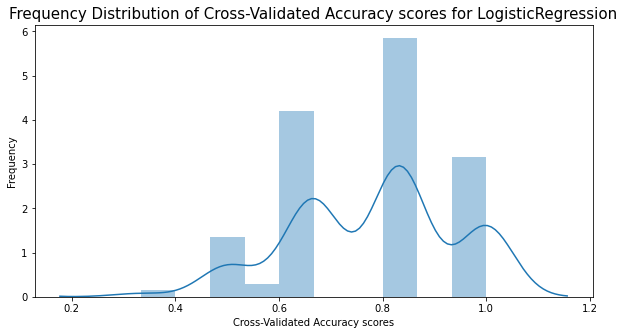

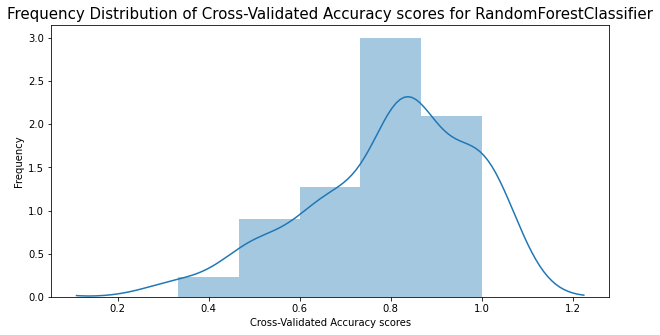

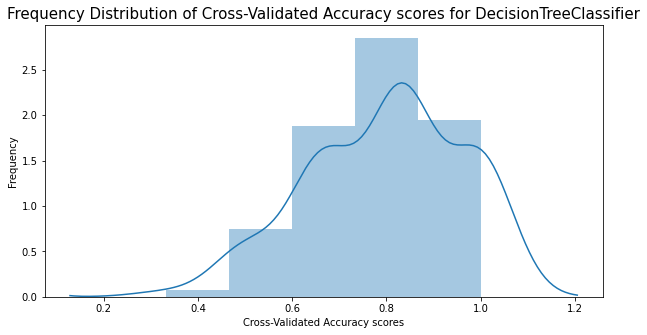

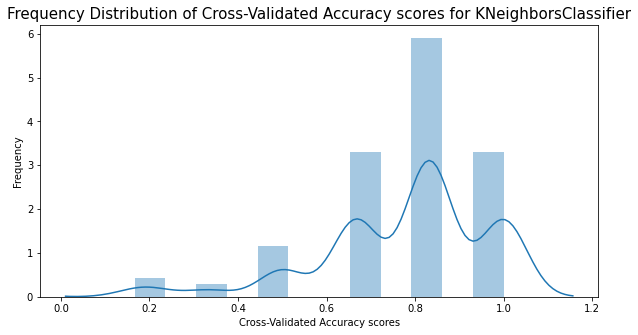

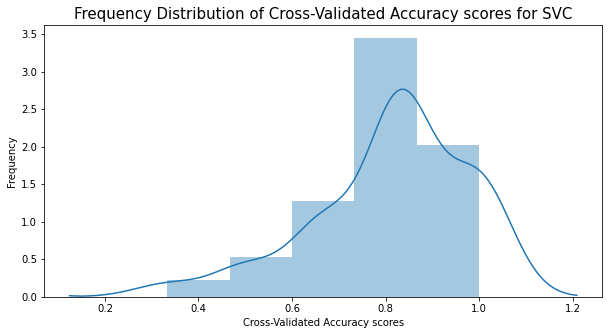

In [168]:
cross_validate_models(models,100)

### Hyperparameter Tuning

In [169]:
lr_params = {"penalty" : ["l1", "l2"],
             "C" : np.logspace(0, 4, 10),
             "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [170]:
dt_params = {"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":[3,9,81,200],
             "min_samples_split":[25,30,35,50]}

In [171]:
knn_params = {"n_neighbors" : [1,3,5,7,9,11,13,15,17,19,21],
              "metric" :  ['euclidean', 'manhattan', 'minkowski'],
              "weights" : ['uniform', 'distance']}             

In [172]:
rf_params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [173]:
svc_params = {'kernel' : ['linear', 'rbf', 'poly'],
'gamma' : [0.1, 1, 10, 100],
'C' : [0.1, 1, 10, 100, 1000],
'degree' : [0, 1, 2, 3, 4, 5, 6]}


In [174]:
models = [lr_model,rf_model,dt_model, knn_model, svc_model]
params = [lr_params,rf_params,dt_params, knn_params, svc_params]

In [175]:
tuned_models = []

In [176]:
import time

In [177]:
def hyper_param_tuning(models,params,splits,scorer):
    for i in range(len(models)):
        gsearch = RandomizedSearchCV(estimator=models[i],
                               param_distributions=params[i],
                               scoring=scorer,
                               verbose=2,
                               n_jobs=-1,
                               cv=5)
        start = time.time()
        gsearch.fit(X_train,y_train)
        end = time.time()
        
        print("Grid Search Results for {}:\n".format(type(models[i]).__name__))
        print("Time taken for tuning (in secs): \n", end-start)
        print("Best parameters: \n",gsearch.best_params_)
        print("Best score: \n",gsearch.best_score_)
        tuned_models.append(gsearch.best_estimator_)
        print("\n\n")

In [178]:
hyper_param_tuning(models,params,100,"accuracy")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Grid Search Results for LogisticRegression:

Time taken for tuning (in secs): 
 1.8285417556762695
Best parameters: 
 {'solver': 'liblinear', 'penalty': 'l1', 'C': 3593.813663804626}
Best score: 
 0.7785714285714287



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   50.2s finished


Grid Search Results for RandomForestClassifier:

Time taken for tuning (in secs): 
 50.50922727584839
Best parameters: 
 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
Best score: 
 0.8104621848739495



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Grid Search Results for DecisionTreeClassifier:

Time taken for tuning (in secs): 
 0.22379612922668457
Best parameters: 
 {'splitter': 'random', 'min_samples_split': 30, 'max_depth': 81, 'criterion': 'entropy'}
Best score: 
 0.8155322128851539



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Grid Search Results for KNeighborsClassifier:

Time taken for tuning (in secs): 
 0.32855796813964844
Best parameters: 
 {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'euclidean'}
Best score: 
 0.7936974789915967



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Grid Search Results for SVC:

Time taken for tuning (in secs): 
 76.92428398132324
Best parameters: 
 {'kernel': 'rbf', 'gamma': 0.1, 'degree': 6, 'C': 1000}
Best score: 
 0.8003641456582633





In [179]:
tuned_models

[LogisticRegression(C=3593.813663804626, penalty='l1', solver='liblinear'),
 RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200),
 DecisionTreeClassifier(criterion='entropy', max_depth=81, min_samples_split=30,
                        splitter='random'),
 KNeighborsClassifier(metric='euclidean', n_neighbors=11),
 SVC(C=1000, degree=6, gamma=0.1, probability=True)]

In [181]:
dt_model_updated =  DecisionTreeClassifier(criterion='entropy', max_depth=81, min_samples_split=25,
                        splitter='random')
dt_model_updated.fit(X_train,y_train)
y_pred_dt_updated = dt_model_updated.predict(test)

In [182]:
submission1 = pd.DataFrame({
        "PassengerId": passenger_id,
        "Survived": y_pred_dt_updated
    })

In [185]:
submission1.to_csv('mysubmission7.csv', index=False)

#### Decision Tree seems to be the most efficient classifier in predicting whether the passenger survived or not with accuracy of 0.78229 on a dataset which our model has never seen before.